In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, log_loss, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import joblib

In [17]:
# Import training and testing sets
X_train = pd.read_csv("/home/s2106664/dissertation/training_testing_dataset/X_train.csv")
X_validate = pd.read_csv("/home/s2106664/dissertation/training_testing_dataset/X_validate.csv")
X_test = pd.read_csv("/home/s2106664/dissertation/training_testing_dataset/X_test.csv")
y_train = pd.read_csv("/home/s2106664/dissertation/training_testing_dataset/y_train.csv").squeeze()
y_validate = pd.read_csv("/home/s2106664/dissertation/training_testing_dataset/y_validate.csv").squeeze()
y_test = pd.read_csv("/home/s2106664/dissertation/training_testing_dataset/y_test.csv").squeeze()

# 1. Hyperparameter tuning using training set cross validation

In [18]:
# features to scale and not to scale
scaled_features = ["hypermutation_rate", "cdr3_length", "Factor_I", "Factor_II",
                   "Factor_III", "Factor_IV", "Factor_V", "np1_length", "np2_length"]

non_scaled_features = X_train.columns.drop(scaled_features)

scaling = ColumnTransformer(transformers=[("scaler", StandardScaler(), scaled_features),
                                          ("passthrough", "passthrough", non_scaled_features)])

pipe = Pipeline([("scaler", scaling),
                 ("sgd", SGDClassifier(loss="log_loss", random_state=42))])


## 1.1 Hyperparameter searching using Gridsearch for l1 and l2 regularisation

In [19]:
param_1 = {
    "sgd__penalty": ["l1", "l2"],
    "sgd__alpha": [0.0001, 0.001, 0.01, 0.1]
}

grid_search_1 = GridSearchCV(
    estimator=pipe,
    param_grid=param_1,
    cv=5,
    scoring="accuracy",
    n_jobs=50,
    verbose=2
)

grid_search_1.fit(X_train, y_train)

joblib.dump(grid_search_1, 'grid_search_1_results_SGD.pkl')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .................sgd__alpha=0.0001, sgd__penalty=l2; total time=  31.5s
[CV] END ....................sgd__alpha=0.1, sgd__penalty=l2; total time=  34.3s
[CV] END ....................sgd__alpha=0.1, sgd__penalty=l2; total time=  34.9s
[CV] END ....................sgd__alpha=0.1, sgd__penalty=l2; total time=  36.4s
[CV] END ...................sgd__alpha=0.01, sgd__penalty=l2; total time=  39.4s
[CV] END .................sgd__alpha=0.0001, sgd__penalty=l2; total time=  39.5s
[CV] END ..................sgd__alpha=0.001, sgd__penalty=l2; total time=  40.8s
[CV] END .................sgd__alpha=0.0001, sgd__penalty=l1; total time=  41.0s
[CV] END ...................sgd__alpha=0.01, sgd__penalty=l1; total time=  41.2s
[CV] END ...................sgd__alpha=0.01, sgd__penalty=l2; total time=  41.8s
[CV] END ..................sgd__alpha=0.001, sgd__penalty=l2; total time=  43.0s
[CV] END .................sgd__alpha=0.0001, sgd_

['grid_search_1_results_SGD.pkl']

In [5]:
grid_search_1 = joblib.load("/home/s2106664/dissertation/model_training/grid_search_1_results_SGD.pkl")

In [20]:
best_param_1 = grid_search_1.best_params_
best_score_1 = grid_search_1.best_score_
print(f"The best parameter for gridsearch_1 is {best_param_1} with the accuracy of {best_score_1}")

The best parameter for gridsearch_1 is {'sgd__alpha': 0.0001, 'sgd__penalty': 'l2'} with the accuracy of 0.5596200210806144


## 1.2 Hyperparameter searching using Gridsearch for elasticnet regularisation

In [21]:
param_2 = {
    "sgd__penalty": ["elasticnet"],
    "sgd__l1_ratio": [0.1, 0.5, 0.9],
    "sgd__alpha": [0.0001, 0.001, 0.01, 0.1]
}

grid_search_2 = GridSearchCV(
    estimator=pipe,
    param_grid=param_2,
    cv=5,
    scoring="accuracy",
    n_jobs=50,
    verbose=2,
    refit=False
)

grid_search_2.fit(X_train, y_train)

joblib.dump(grid_search_2, 'grid_search_2_results_SGD.pkl')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END sgd__alpha=0.0001, sgd__l1_ratio=0.5, sgd__penalty=elasticnet; total time=  43.4s
[CV] END sgd__alpha=0.01, sgd__l1_ratio=0.1, sgd__penalty=elasticnet; total time=  44.0s
[CV] END sgd__alpha=0.0001, sgd__l1_ratio=0.9, sgd__penalty=elasticnet; total time=  44.4s
[CV] END sgd__alpha=0.0001, sgd__l1_ratio=0.1, sgd__penalty=elasticnet; total time=  44.8s
[CV] END sgd__alpha=0.0001, sgd__l1_ratio=0.1, sgd__penalty=elasticnet; total time=  48.2s
[CV] END sgd__alpha=0.01, sgd__l1_ratio=0.1, sgd__penalty=elasticnet; total time=  51.8s
[CV] END sgd__alpha=0.0001, sgd__l1_ratio=0.9, sgd__penalty=elasticnet; total time=  54.8s
[CV] END sgd__alpha=0.001, sgd__l1_ratio=0.5, sgd__penalty=elasticnet; total time=  56.6s
[CV] END sgd__alpha=0.01, sgd__l1_ratio=0.1, sgd__penalty=elasticnet; total time=  57.1s
[CV] END sgd__alpha=0.01, sgd__l1_ratio=0.9, sgd__penalty=elasticnet; total time=  55.6s
[CV] END sgd__alpha=0.01, sgd__l1_rati

['grid_search_2_results_SGD.pkl']

In [ ]:
grid_search_2 = joblib.load("/home/s2106664/dissertation/model_training/grid_search_2_results_SGD.pkl")

['grid_search_2_results.pkl']

In [24]:
best_param_2 = grid_search_2.best_params_
best_score_2 = grid_search_2.best_score_
print(f"The best parameter for gridsearch_2 is {best_param_2} with the accuracy of {best_score_2}")

The best parameter for gridsearch_2 is {'sgd__alpha': 0.0001, 'sgd__l1_ratio': 0.1, 'sgd__penalty': 'elasticnet'} with the accuracy of 0.5596139860142918


In [25]:
print(f"The best model in GridSearch_1 gives the accuracy of {best_score_1} under the parameter {best_param_1}")
print(f"The best model in GridSearch_2 gives the accuracy of {best_score_2} under the parameter {best_param_2}")

if best_score_1 > best_score_2:
    print(f"The model with parameter {best_param_1} is better")
    best_param = best_param_1.copy()
elif best_score_1 == best_score_2:
    print("Both models gives the same score")
    best_param = best_score_1.copy()
else:
    print(f"The model with parameter {best_param_2} is better")
    best_param = best_param_2.copy()

The best model in GridSearch_1 gives the accuracy of 0.5596200210806144 under the parameter {'sgd__alpha': 0.0001, 'sgd__penalty': 'l2'}
The best model in GridSearch_2 gives the accuracy of 0.5596139860142918 under the parameter {'sgd__alpha': 0.0001, 'sgd__l1_ratio': 0.1, 'sgd__penalty': 'elasticnet'}
The model with parameter {'sgd__alpha': 0.0001, 'sgd__penalty': 'l2'} is better


# 2. Model training using complete datasets

In [28]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[scaled_features] = scaler.fit_transform(X_train_scaled[scaled_features])

X_validate_scaled = X_validate.copy()
X_validate_scaled[scaled_features] = scaler.transform(X_validate[scaled_features])

X_test_scaled = X_test.copy()
X_test_scaled[scaled_features] = scaler.transform(X_test[scaled_features])

## 2.1 Training model with early stopping using patience = 10

In [29]:
sgd_model = SGDClassifier(loss="log_loss",
                          penalty="l2",
                          alpha=0.0001,
                          n_jobs=50,
                          verbose=2,
                          random_state=42,
                          max_iter=1,
                          tol=None,
                          warm_start=True)

train_losses = []
val_losses = []

classes = np.unique(y_train)
max_epochs = 500
patience = 5
best_val_loss = np.inf
epochs_without_improvement = 0

for epoch in range(max_epochs):
    sgd_model.partial_fit(X_train, y_train, classes=classes)

    # Training predictions and metrics
    train_probs = sgd_model.predict_proba(X_train_scaled)
    train_loss = log_loss(y_train, train_probs)

    train_losses.append(train_loss)

    # Validation predictions and metrics
    val_probs = sgd_model.predict_proba(X_validate_scaled)
    val_loss = log_loss(y_validate, val_probs)

    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")
    if val_loss < best_val_loss - 1e-4:  # min_delta = 1e-4
        best_val_loss = val_loss
        best_model = sgd_model
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

# Dump the result into pkl format
joblib.dump(best_model, 'logistic_regression_model_SGD.pkl')

-- Epoch 1
Norm: 7.70, NNZs: 75, Bias: -0.099241, T: 7290722, Avg. loss: 7.290095
Total training time: 2.91 seconds.
Epoch 1: Train Loss=2.5883, Val Loss=2.5896
-- Epoch 1
Norm: 5.50, NNZs: 75, Bias: -0.116297, T: 7290722, Avg. loss: 0.894169
Total training time: 2.87 seconds.
Epoch 2: Train Loss=1.8784, Val Loss=1.8793
-- Epoch 1
Norm: 4.98, NNZs: 75, Bias: -0.126554, T: 7290722, Avg. loss: 0.785725
Total training time: 2.85 seconds.
Epoch 3: Train Loss=1.7122, Val Loss=1.7132
-- Epoch 1
Norm: 4.76, NNZs: 75, Bias: -0.129786, T: 7290722, Avg. loss: 0.749549
Total training time: 2.85 seconds.
Epoch 4: Train Loss=1.6457, Val Loss=1.6466
-- Epoch 1
Norm: 4.65, NNZs: 75, Bias: -0.130859, T: 7290722, Avg. loss: 0.731589
Total training time: 2.86 seconds.
Epoch 5: Train Loss=1.6106, Val Loss=1.6114
-- Epoch 1
Norm: 4.58, NNZs: 75, Bias: -0.131173, T: 7290722, Avg. loss: 0.720887
Total training time: 2.88 seconds.
Epoch 6: Train Loss=1.5890, Val Loss=1.5898
-- Epoch 1
Norm: 4.53, NNZs: 75, B

['logistic_regression_model_SGD.pkl']

In [31]:
logistic_regression_model = joblib.load("/home/s2106664/dissertation/model_training/logistic_regression_model_SGD.pkl")

In [30]:
training_log = pd.DataFrame({
    "epoch": list(range(1, len(train_losses) + 1)),
    "train_loss": train_losses,
    "val_loss": val_losses,
})

training_log.to_csv("training_log.csv", index=False)

## 2.2 Validation on training, validation, and test set

In [32]:
y_pred_train = logistic_regression_model.predict(X_train_scaled)
f1_train = f1_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

In [35]:
accuracy_train, f1_train

(0.5457607627886512, 0.5682914664704006)

In [36]:
y_pred_validate = logistic_regression_model.predict(X_validate_scaled)
f1_validate = f1_score(y_validate, y_pred_validate)
accuracy_validate = accuracy_score(y_validate, y_pred_validate)

In [37]:
accuracy_validate, f1_validate

(0.5458785963526236, 0.5682253755058648)

In [38]:
y_pred_test = logistic_regression_model.predict(X_test_scaled)
f1_test = f1_score(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [39]:
accuracy_test, f1_test

(0.545870316379928, 0.568423247980896)

## 2.3 Plotting train-loss curve

In [40]:
training_log = pd.read_csv("/home/s2106664/dissertation/model_training/training_log.csv")

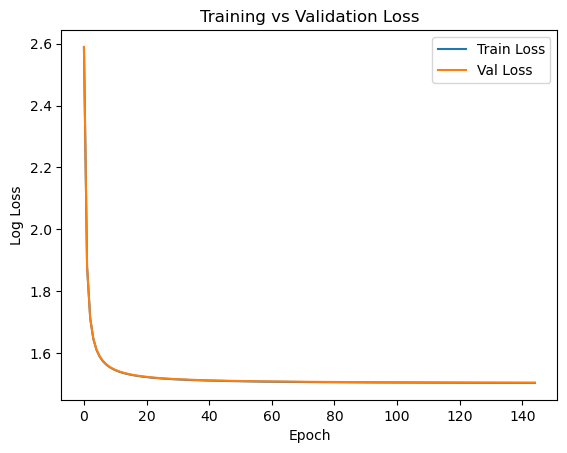

In [49]:
plt.plot(training_log["train_loss"], label="Train Loss")
plt.plot(training_log["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.savefig("logistic_training_loss.png", dpi=300, bbox_inches='tight')
plt.show()

## 2.4 Plotting confusion matrix

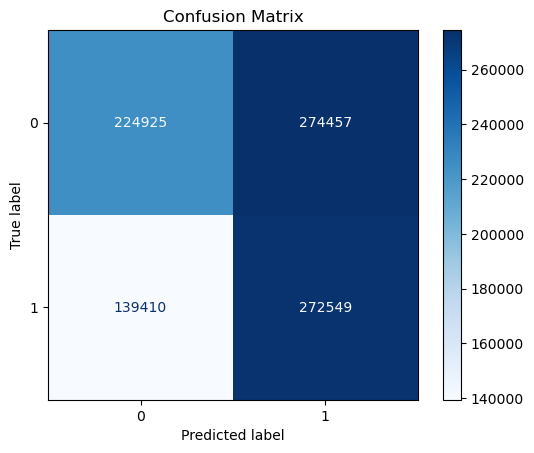

In [48]:
predicted = logistic_regression_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig("logistic_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

## 2.5 Plotting ROC curve

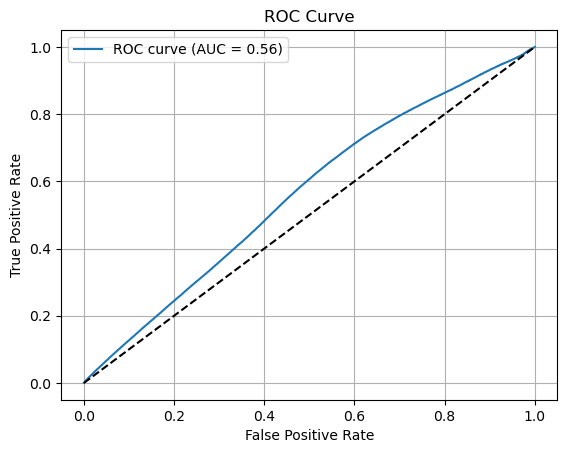

Probabilities (first 10): [0.95279526 0.96579017 0.00600901 0.94389088 0.94353786 0.03386318
 0.55414431 0.50122506 0.90678217 0.04153053]
True labels (first 10): 0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: disease_status, dtype: int64


In [47]:
y_prob = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.savefig("logistic_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

print("Probabilities (first 10):", y_prob[:10])
print("True labels (first 10):", y_test[:10])